Text(0.5, 1.0, 'Loss')

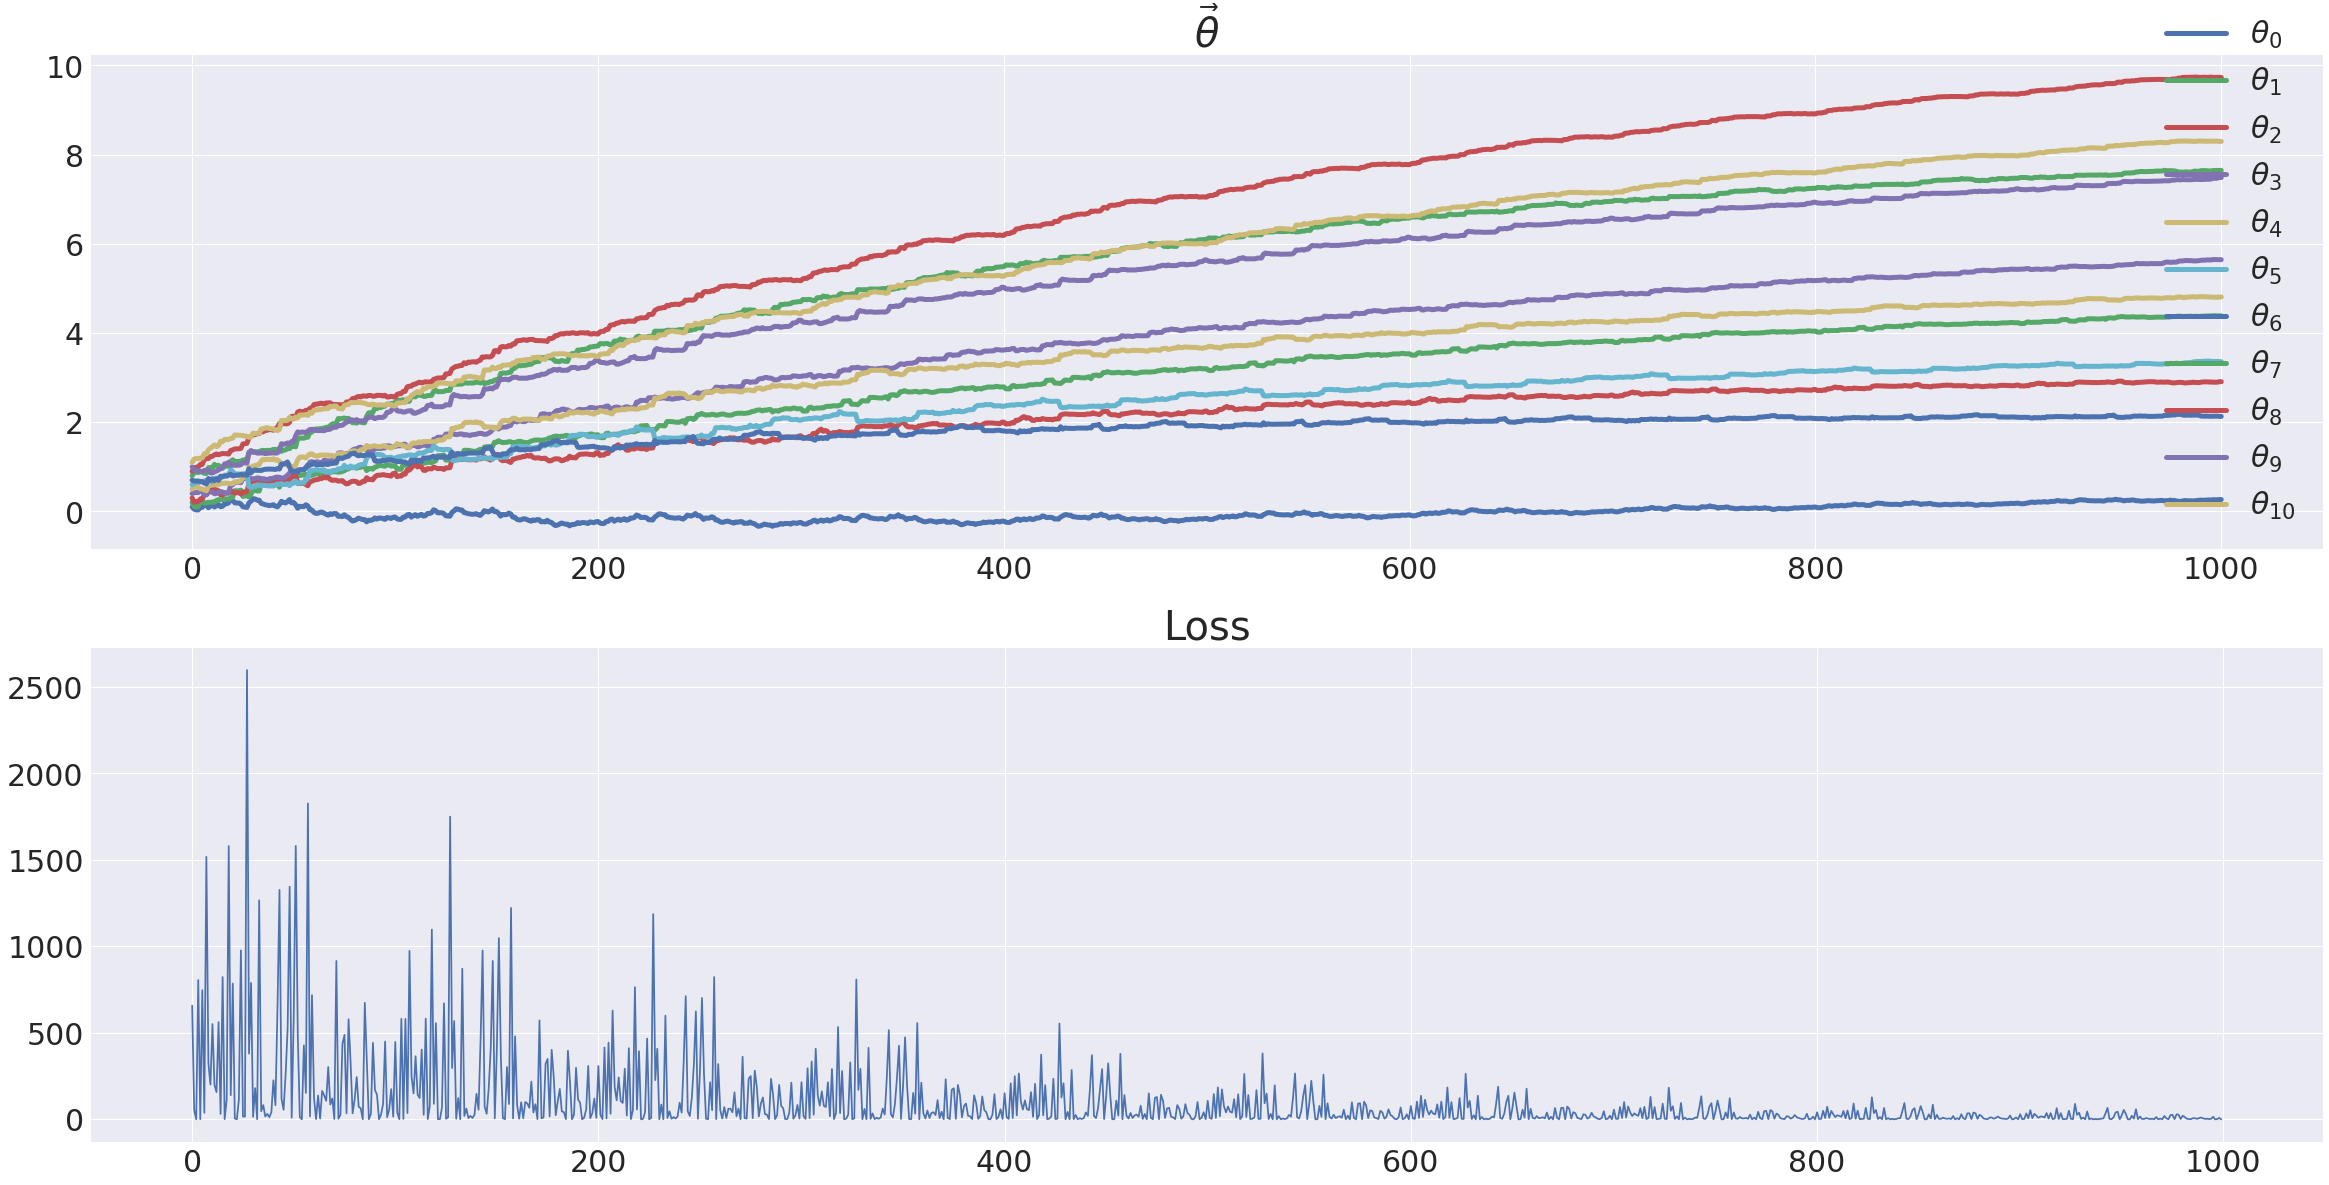

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
#-----------------------------------------------------------------------------

plt.style.use('seaborn') 
np.random.seed(0)

n_sample = 100
feature_dim = 10
coefficient_list = [1,5, 3, 7, 6, 4, 2, 8, 12, 9, 10] 
distribution_params = {1:{'mean':0,'std':1}, 
                       2:{'mean':0,'std':1}, 
                       3:{'mean':0,'std':1},
                       4:{'mean':0,'std':1}, 
                       5:{'mean':0,'std':1}, 
                       6:{'mean':0,'std':1},
                       7:{'mean':0,'std':1}, 
                       8:{'mean':0,'std':1}, 
                       9:{'mean':0,'std':1},
                       10:{'mean':0,'std':1}}

y_data = np.zeros(shape = (n_sample, 1)) 
x_data = np.zeros(shape = (n_sample, 1))
for feature_idx in range(1, feature_dim + 1):    
    feature_data = np.random.normal(loc = distribution_params[feature_idx]['mean'], 
                                    scale = distribution_params[feature_idx]['std'], 
                                    size = (n_sample, 1))    
    x_data = np.hstack((x_data, feature_data))    
    y_data += coefficient_list[feature_idx]*feature_data

    
y_data += coefficient_list[0] 
#print(x_data.shape, y_data.shape)

node1 = [None] + [mul_node() for _ in range(feature_dim)]
node2 = [None] + [plus_node() for _ in range(feature_dim)]

node3 = minus_node()
node4 = square_node()

th_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
epochs, lr = 10, 0.001

th_accum = np.array(th_list).reshape(-1,1)
loss_list = []

for epoch in range(epochs) :
    for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
        z1_list = [None]*(feature_dim + 1)
        z2_list, dz2_list, dz1_list, dth_list = z1_list.copy(), z1_list.copy(), z1_list.copy(), z1_list.copy()
        
        #forward propagation
        
        for node_idx in range(1, feature_dim + 1):
            z1_list[node_idx] = node1[node_idx].forward(th_list[node_idx], X[node_idx])
            
        z2_list[1] = node2[1].forward(th_list[0], z1_list[1])
        
        for node_idx in range(2, feature_dim + 1):
            z2_list[node_idx] = node2[node_idx].forward(z2_list[node_idx-1], z1_list[node_idx])
        
        z3 = node3.forward(y, z2_list[-1])
        l = node4.forward(z3)

        #backward propagation 
        
        dz3 = node4.backward(1)
        _, dz2_last = node3.backward(dz3)
        dz2_list[-1] = dz2_last

        for node_idx in reversed(range(1, feature_dim + 1)):
            dz2, dz1 = node2[node_idx].backward(dz2_list[node_idx])
            dz2_list[node_idx-1] = dz2
            dz1_list[node_idx] = dz1
    
        dth_list[0] = dz2_list[0]

        for node_idx in reversed(range(1, feature_dim + 1)):
            dth, _ = node1[node_idx].backward(dz1_list[node_idx])
            dth_list[node_idx] = dth
    
        for th_idx in range(len(th_list)):
            th_list[th_idx] = th_list[th_idx] - lr*dth_list[th_idx]
               
        th_next = np.array(th_list).reshape(-1,1) #column vector로 만들어주기
        th_accum = np.hstack((th_accum, th_next))
        loss_list.append(l)
        
fig, ax = plt.subplots(2,1, figsize = (40,20))
for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i, linewidth = 5)
            
ax[1].plot(loss_list)
        
ax[0].legend(loc = 'lower right', fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 30)
        
ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Loss', fontsize = 40)

Text(0.5, 1.0, 'Loss')

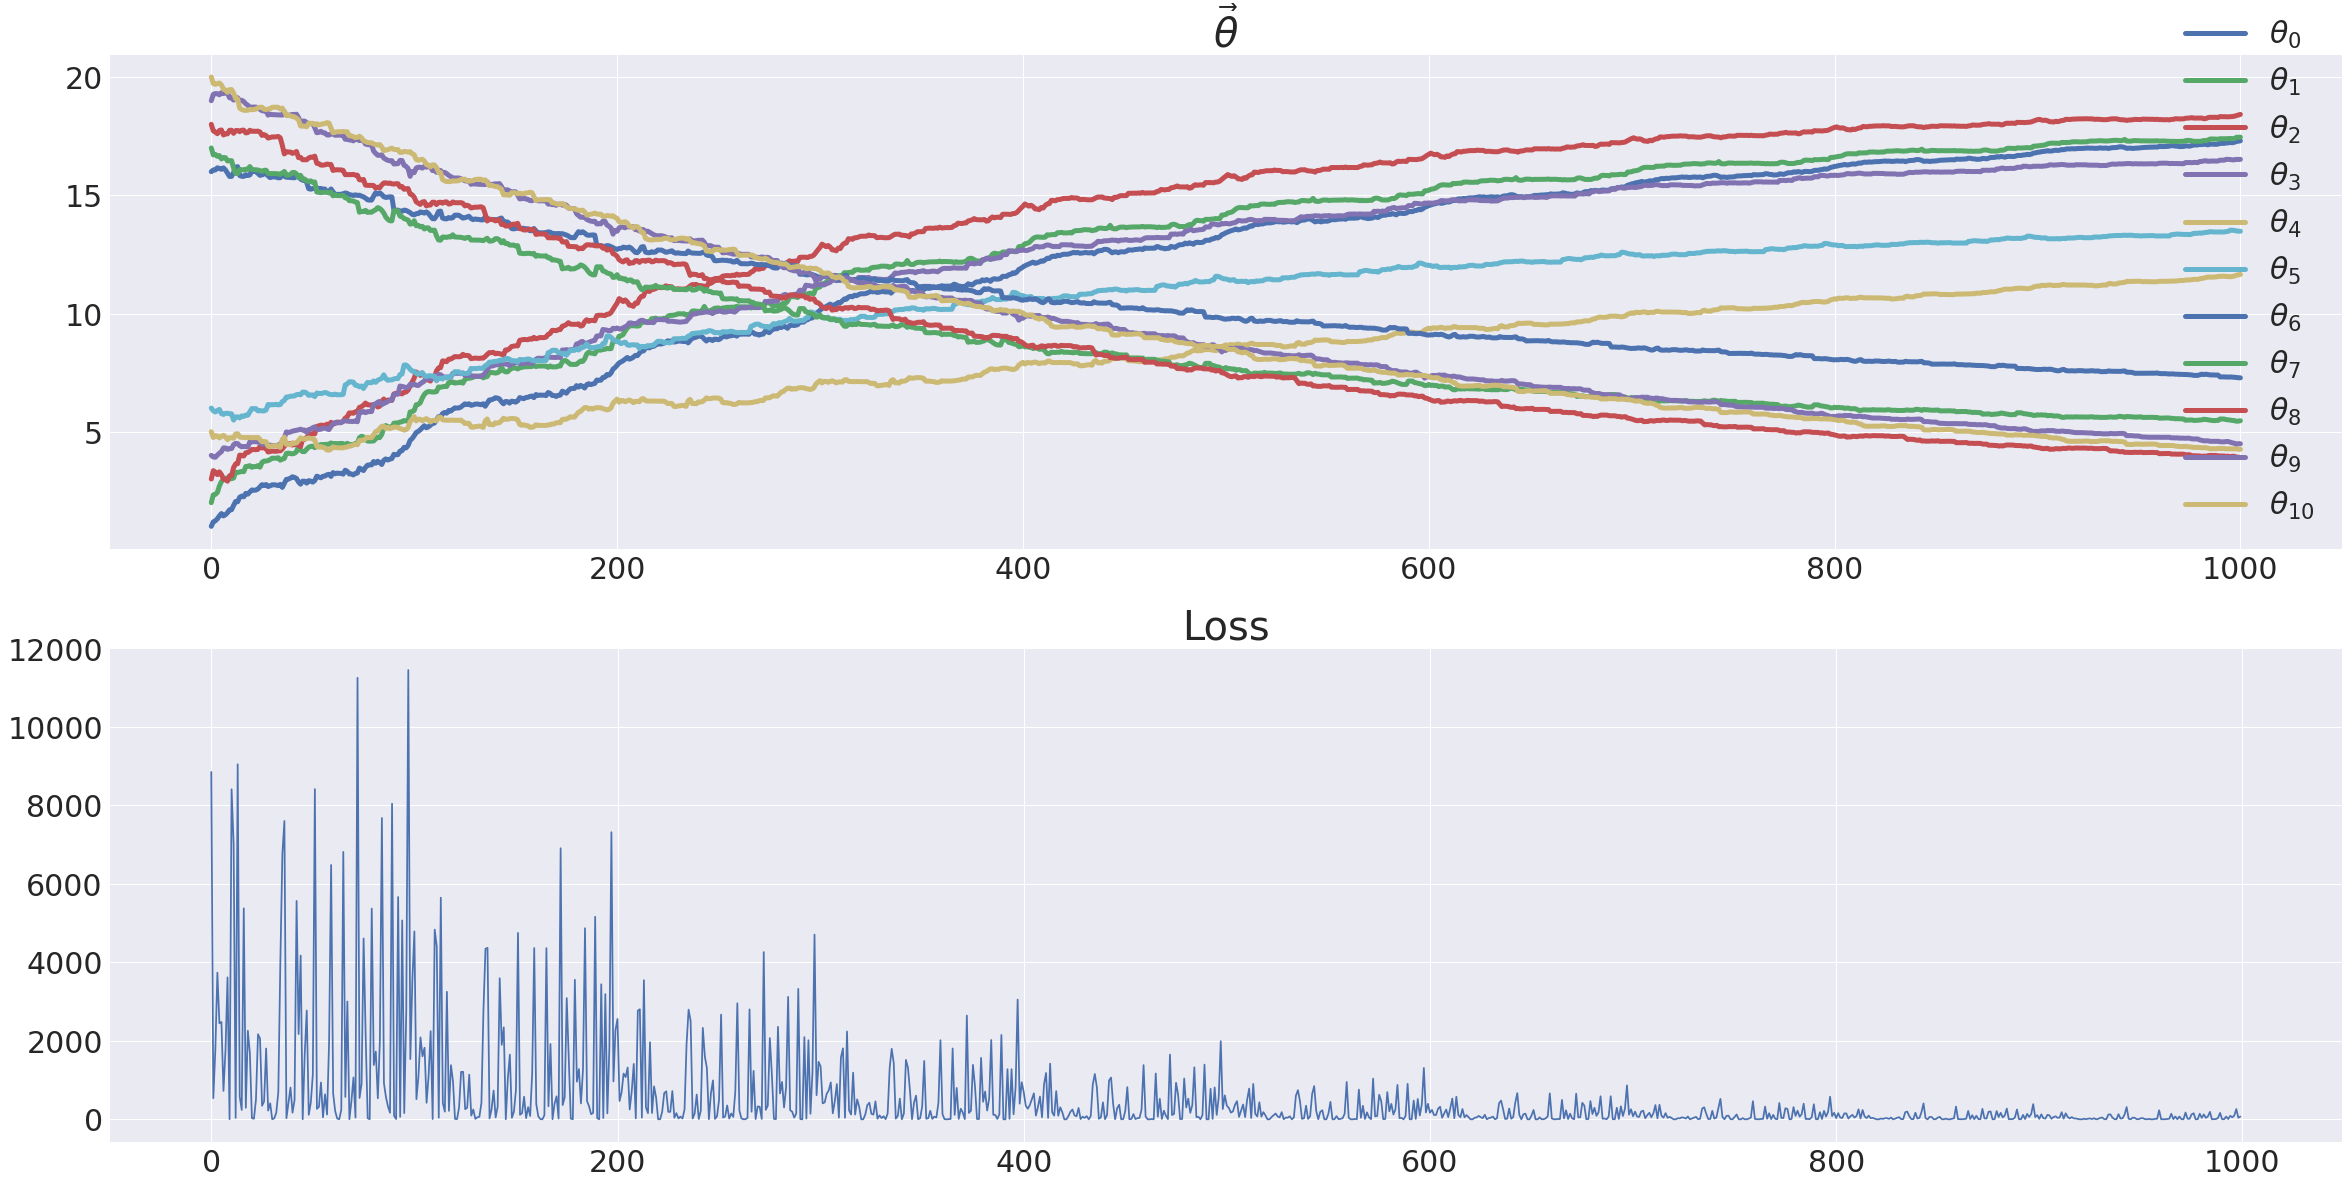

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
#-----------------------------------------------------------------------------

plt.style.use('seaborn') 
np.random.seed(0)

n_sample = 100
feature_dim = 10
coefficient_list = [20, 19, 18, 17, 16, 15, 5, 4, 3, 2, 1] 
distribution_params = {1:{'mean':0,'std':1}, 
                       2:{'mean':0,'std':1}, 
                       3:{'mean':0,'std':1},
                       4:{'mean':0,'std':1}, 
                       5:{'mean':0,'std':1}, 
                       6:{'mean':0,'std':1},
                       7:{'mean':0,'std':1}, 
                       8:{'mean':0,'std':1}, 
                       9:{'mean':0,'std':1},
                       10:{'mean':0,'std':1}}

y_data = np.zeros(shape = (n_sample, 1)) 
x_data = np.zeros(shape = (n_sample, 1))
for feature_idx in range(1, feature_dim + 1):    
    feature_data = np.random.normal(loc = distribution_params[feature_idx]['mean'], 
                                    scale = distribution_params[feature_idx]['std'], 
                                    size = (n_sample, 1))    
    x_data = np.hstack((x_data, feature_data))    
    y_data += coefficient_list[feature_idx]*feature_data

    
y_data += coefficient_list[0] 
#print(x_data.shape, y_data.shape)

node1 = [None] + [mul_node() for _ in range(feature_dim)]
node2 = [None] + [plus_node() for _ in range(feature_dim)]

node3 = minus_node()
node4 = square_node()

th_list = [1, 2, 3, 4, 5, 6, 16, 17, 18, 19, 20]
epochs, lr = 10, 0.001

th_accum = np.array(th_list).reshape(-1,1)
loss_list = []

for epoch in range(epochs) :
    for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
        z1_list = [None]*(feature_dim + 1)
        z2_list, dz2_list, dz1_list, dth_list = z1_list.copy(), z1_list.copy(), z1_list.copy(), z1_list.copy()
        
        #forward propagation
        
        for node_idx in range(1, feature_dim + 1):
            z1_list[node_idx] = node1[node_idx].forward(th_list[node_idx], X[node_idx])
            
        z2_list[1] = node2[1].forward(th_list[0], z1_list[1])
        
        for node_idx in range(2, feature_dim + 1):
            z2_list[node_idx] = node2[node_idx].forward(z2_list[node_idx-1], z1_list[node_idx])
        
        z3 = node3.forward(y, z2_list[-1])
        l = node4.forward(z3)

        #backward propagation 
        
        dz3 = node4.backward(1)
        _, dz2_last = node3.backward(dz3)
        dz2_list[-1] = dz2_last

        for node_idx in reversed(range(1, feature_dim + 1)):
            dz2, dz1 = node2[node_idx].backward(dz2_list[node_idx])
            dz2_list[node_idx-1] = dz2
            dz1_list[node_idx] = dz1
    
        dth_list[0] = dz2_list[0]

        for node_idx in reversed(range(1, feature_dim + 1)):
            dth, _ = node1[node_idx].backward(dz1_list[node_idx])
            dth_list[node_idx] = dth
    
        for th_idx in range(len(th_list)):
            th_list[th_idx] = th_list[th_idx] - lr*dth_list[th_idx]
               
        th_next = np.array(th_list).reshape(-1,1) #column vector로 만들어주기
        th_accum = np.hstack((th_accum, th_next))
        loss_list.append(l)
        
fig, ax = plt.subplots(2,1, figsize = (40,20))
for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i, linewidth = 5)
            
ax[1].plot(loss_list)
        
ax[0].legend(loc = 'lower right', fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 30)
        
ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Loss', fontsize = 40)

### YoungJaeLee_AI